In [ ]:
# 请你写一个几何风格的纹样生成器
# 生成的图片应该以正方形为基本单位, 长为10个正方形,高为6个正方形.
# 生成正方形时,要按照预设的随机规则生成
# 随机规则包含：
# 1. 正方形的底色将在这个颜色列表中随机分配【透明，天蓝色，浅蓝色，深蓝色】
# 2. 正方形上还会叠加着绘制一个子图形，子图形在这个图形列表中随机分配【圆形、左上四分之一圆形、左下四分之一圆形、右上四分之一圆形、右下四分之一圆形、空白】
# 3. 子图形的颜色将在这个颜色列表中随机分配【天蓝色，浅蓝色，深蓝色】
# 请使用python和seaborn创作。

In [45]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import choice

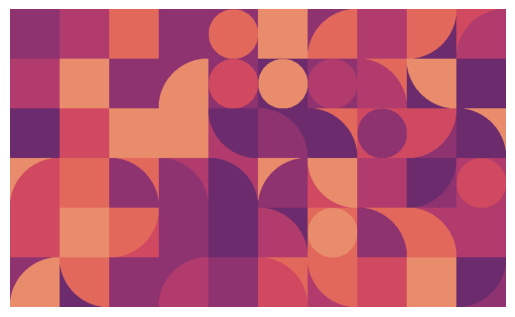

In [44]:


# 定义颜色列表和图形列表
color_palettes = ['crest', 'flare', 'light:r', 'light:g', 'light:yellow', 'light:b', 'Blues']
shapes = ['circle', 'quarter circle top left', 'quarter circle bottom left', 
          'quarter circle top right', 'quarter circle bottom right', 'blank']

def generate_square(color, shape_color, shape):
    square = np.zeros((100, 100, 3))

    # 设置正方形底色
    if color != 'transparent':
        square[:, :, :] = color

    # 绘制子图形
    if shape != 'blank':
        shape_color_rgb = shape_color
        if shape == 'circle':
            radius = min(square.shape[0], square.shape[1]) // 2
            center = (square.shape[0] // 2, square.shape[1] // 2)
            for i in range(square.shape[0]):
                for j in range(square.shape[1]):
                    if np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2) <= radius:
                        square[i, j, :] = shape_color_rgb
        elif shape == 'quarter circle top left':
            radius = min(square.shape[0], square.shape[1]) 
            for i in range(square.shape[0]):
                for j in range(square.shape[1]):
                    if np.sqrt((i - 0) ** 2 + (j - 0) ** 2) <= radius:
                        square[i, j, :] = shape_color_rgb
        elif shape == 'quarter circle bottom left':
            radius = min(square.shape[0], square.shape[1])
            for i in range(square.shape[0]):
                for j in range(square.shape[1]):
                    if np.sqrt((i - 0) ** 2 + (j - (square.shape[1]-1)) ** 2) <= radius:
                        square[i, j, :] = shape_color_rgb
        elif shape == 'quarter circle top right':
            radius = min(square.shape[0], square.shape[1]) 
            for i in range(square.shape[0]):
                for j in range(square.shape[1]):
                    if np.sqrt((i - (square.shape[0]-1)) ** 2 + (j - 0) ** 2) <= radius:
                        square[i, j, :] = shape_color_rgb
        elif shape == 'quarter circle bottom right':
            radius = min(square.shape[0], square.shape[1]) 
            for i in range(square.shape[0]):
                for j in range(square.shape[1]):
                    if np.sqrt((i - (square.shape[0]-1)) ** 2 + (j - (square.shape[1]-1)) ** 2) <= radius:
                        square[i, j, :] = shape_color_rgb

    return square

def generate_pattern():
    pattern = np.zeros((600, 1000, 3))
    palette_name = choice(color_palettes)
    for i in range(6):
        for j in range(10):
            color = choice(sns.color_palette(palette_name))
            shape_color = choice(sns.color_palette(palette_name))
            shape = choice(shapes)

            square = generate_square(color, shape_color, shape)

            pattern[i*100:i*100+100, j*100:j*100+100, :] = square

    return pattern

def plot_pattern(pattern):
    plt.imshow(pattern)
    plt.axis('off')
    plt.show()

pattern = generate_pattern()
plot_pattern(pattern)